Total videos (batches) in train split: 7465
Batch input shape: torch.Size([200, 4, 112, 112])
Batch mask shape: torch.Size([200, 1, 112, 112])


/home/hc4293/echoframe/dataloaderv2.py:109: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  m = torch.load(mask_path)


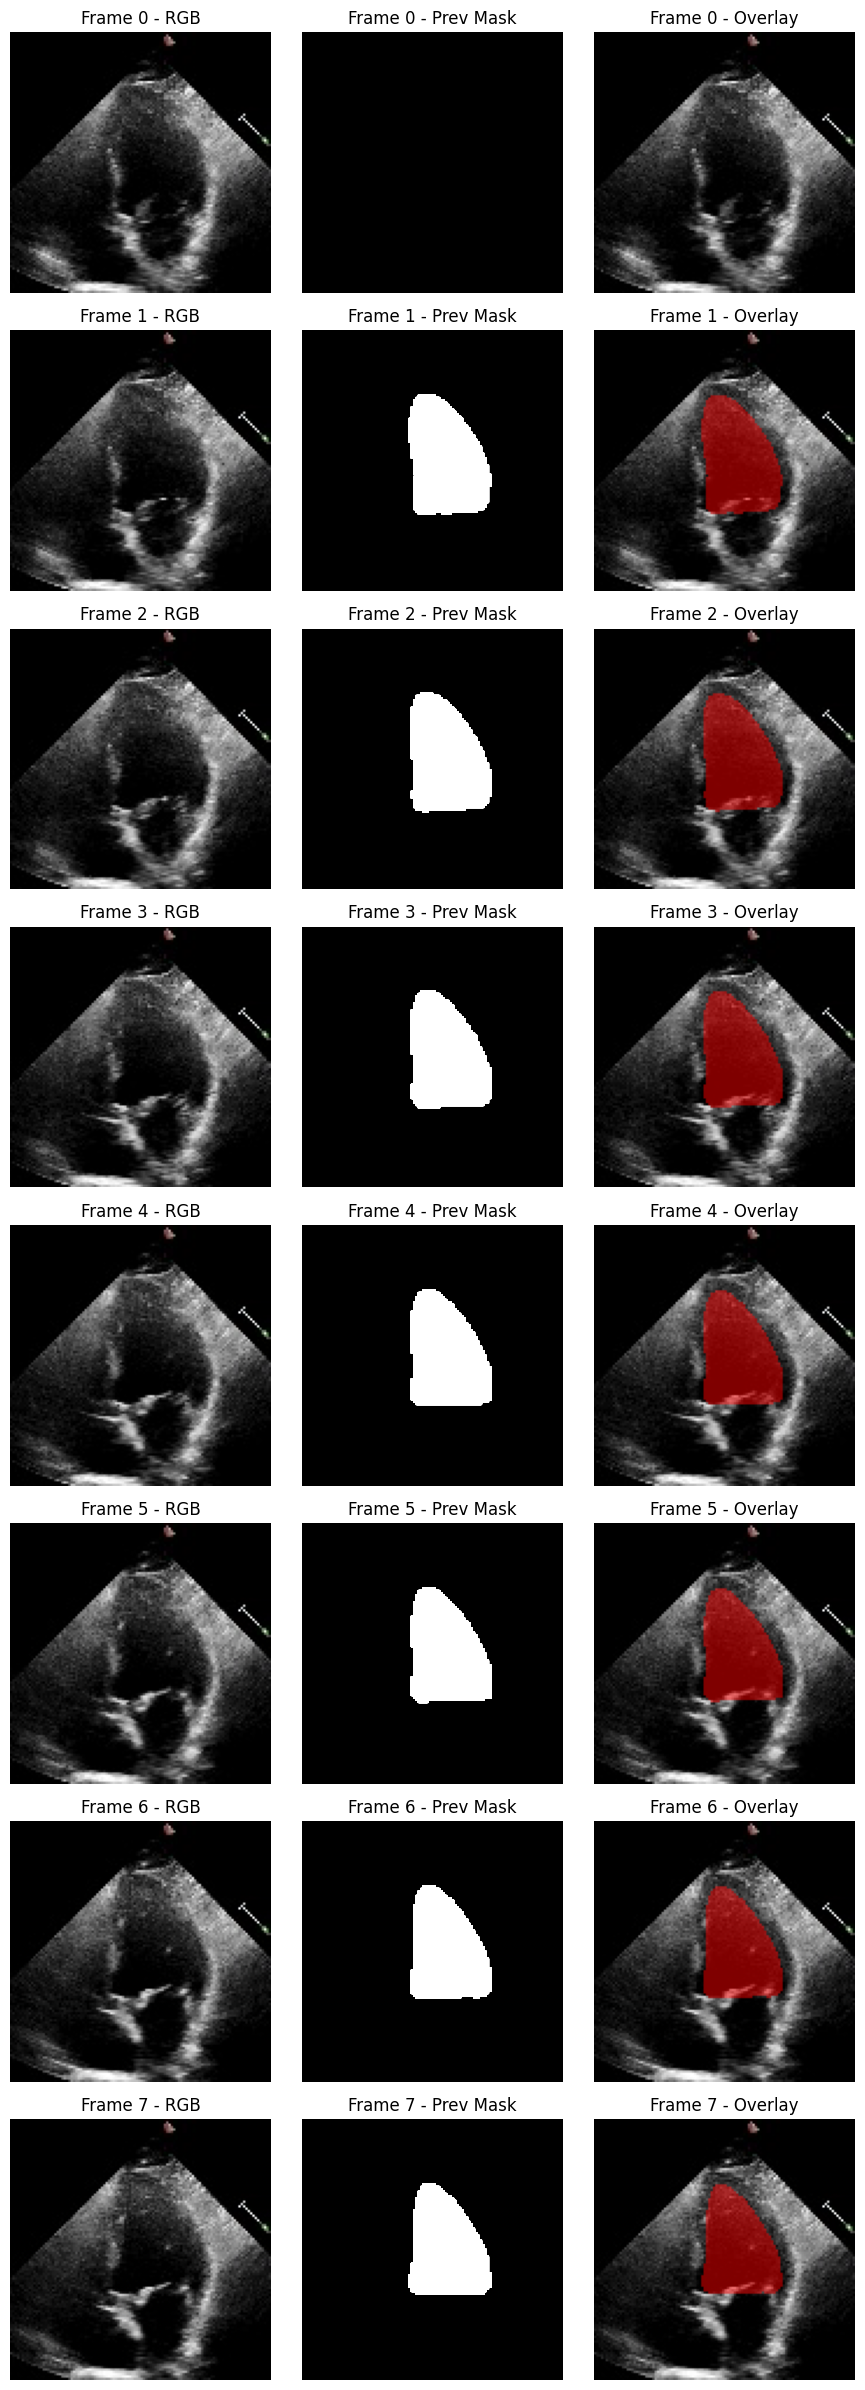

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import DataLoader
from dataloaderv2 import EchoVideoDataset

# Assuming EchoVideoDataset is defined as fixed in the previous step:
# from dataloaderv2 import EchoVideoDataset

# Create dataset and dataloader
echo_train = EchoVideoDataset(root="./data/echodynamic", split='train')
train_loader = DataLoader(echo_train, batch_size=1, shuffle=True)

print("Total videos (batches) in train split:", len(echo_train))

# Get one batch (one video)
for batch_inp, batch_mask in train_loader:
    # batch_inp: (1, num_frames, 4, H, W)
    # batch_mask: (1, num_frames, 1, H, W)
    # We'll squeeze out the batch dimension:
    batch_inp = batch_inp.squeeze(0)   # (num_frames,4,H,W)
    batch_mask = batch_mask.squeeze(0) # (num_frames,1,H,W)

    print("Batch input shape:", batch_inp.shape)
    print("Batch mask shape:", batch_mask.shape)

    # Let's visualize the first 8 frames (if available)
    num_frames = batch_inp.shape[0]
    max_frames_to_show = min(num_frames, 8)

    # We will plot three columns:
    # Column 1: Current Frame (RGB)
    # Column 2: Previous Mask (Grayscale)
    # Column 3: Current Frame with Previous Mask Overlaid

    fig, axs = plt.subplots(nrows=max_frames_to_show, ncols=3, figsize=(9, 3*max_frames_to_show))

    for i in range(max_frames_to_show):
        # Extract current frame (RGB)
        current_frame = batch_inp[i, :3].numpy().transpose(1,2,0)  # (H,W,C)
        # Extract previous mask (single channel)
        prev_mask = batch_inp[i, 3].numpy()  # (H,W)

        # Plot current frame
        axs[i,0].imshow(current_frame)
        axs[i,0].set_title(f"Frame {i} - RGB")
        axs[i,0].axis('off')

        # Plot previous mask
        axs[i,1].imshow(prev_mask, cmap='gray', vmin=0, vmax=1)
        axs[i,1].set_title(f"Frame {i} - Prev Mask")
        axs[i,1].axis('off')

        # Create overlay of previous mask on current frame
        # We will overlay the mask in red color. Pixels where prev_mask=1 will be highlighted in red.
        overlay_frame = current_frame.copy()
        # Define an overlay color, e.g., red for mask regions
        overlay_color = np.array([1.0, 0.0, 0.0])  # pure red
        # Create an alpha channel based on prev_mask (0->transparent, 1->full overlay)
        alpha = 0.5  # Half transparency
        # Blend the overlay color into the frame where mask is 1
        # If your mask is binary {0,1}, this will highlight those pixels.
        # If it's not strictly binary, consider thresholding.
        mask_bool = (prev_mask > 0.5)  # create a boolean mask
        overlay_frame[mask_bool] = (1 - alpha)*overlay_frame[mask_bool] + alpha*overlay_color

        axs[i,2].imshow(overlay_frame)
        axs[i,2].set_title(f"Frame {i} - Overlay")
        axs[i,2].axis('off')

    plt.tight_layout()
    plt.show()

    break  # Show just one batch
